In [1]:
%load_ext autoreload
%autoreload 2
### HIER DIE METHODEN REIN WIR IN TRAINNLP 
import torch
from torch import nn

import train
import TorchRandomSeed
import modelClass
import dataloader
from torch.utils.data import SubsetRandomSampler
from time import time
seed =1
seedObject = TorchRandomSeed.TorchRandomSeed(seed=1) 

_t_start = time()

with seedObject:
    droplist = []#["BloodPressure", "Pregnancies", "Age", "SkinThickness"]
    num_epochs = 30
    batch_size = 32
    
    test_size = 0.3 # is going to be split again in eval and test
    device = "cuda:0" if torch.cuda.is_available() else "cpu"
    #dirPath = "/home/rosario/explainable/Bachelor/"# root
    dirPath= "./" 

    modelsDirPath = dirPath+ "Models"

    print("calculating on: " +str(device))
    lr = 0.001 #slowed learningrate # 0.1 after 20 epoch full

    # load data
  
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames, datasetType= dataloader.load_kaggle_diabetes_dataset(batch_size=batch_size)
    trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames, datasetType= dataloader.BreastCancerUCI(batch_size= batch_size, test_size=test_size)
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames= dataloader.dryBeanUCI(batch_size=batch_size , droplist= droplist)
    
    #model = modelClass.Net(inputFeatures= inputFeatures, out_features=outputFeatures)
    model= modelClass.BinaryClassification2HL64N(inputFeatures= inputFeatures, outputFeatures= outputFeatures)
    modelName = model.modelName
    
    #print(random_indices_test)

    #for i,c in testloader:
    #    print(i[0])
    #    print(X_test[random_indices_test[0]])
    #    break
    
    # Backward Propergation - loss and optimizer
    loss_function = nn.CrossEntropyLoss()
    #optimizer = torch.optim.SGD(model.parameters(),lr=lr)
    optimizer = torch.optim.Adam(model.parameters())
    #grads = train.train(trainloader, model, num_epochs, device, y_train,loss_function, optimizer)    
    total_gradientsList =  train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)
 
    #train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)
    print(dirPath)

    import evalModel
    import plotResults
    from matplotlib import pyplot as plt
    print("evaluating ...")
    loaderList = [testloader]
    nameList = ["test"]
    yList = [y_test]
    evalModel.doALLeval(model, modelsDirPath, dirPath, loaderList, device,optimizer, loss_function, num_epochs, nameList, yList, inputFeatures, random_indices_test)
    #print(dirPath)
    print(modelsDirPath)

calculating on: cpu
(569,)
(569, 30)
tensor([[-0.2435, -0.2473,  0.2055,  ..., -0.3219, -0.3210, -0.3220],
        [-0.2397, -0.2066,  0.1991,  ..., -0.3178, -0.3167, -0.3183],
        [-0.2316, -0.2095,  0.2728,  ..., -0.3239, -0.3222, -0.3240],
        ...,
        [-0.2448, -0.2370,  0.0793,  ..., -0.3024, -0.3016, -0.3026],
        [-0.2335, -0.2097,  0.2610,  ..., -0.3246, -0.3225, -0.3246],
        [-0.2355, -0.1391,  0.3265,  ..., -0.3400, -0.3376, -0.3397]])
train:shuffel = True
eval:shuffel = True


/home/rosario/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Epoch: 0
      Training_acc: 0.6256281407035176
-------------------

Epoch: 1
      Training_acc: 0.6256281407035176
-------------------

Epoch: 2
      Training_acc: 0.6256281407035176
-------------------

Epoch: 3
      Training_acc: 0.6256281407035176
-------------------

Epoch: 4
      Training_acc: 0.635678391959799
-------------------

Epoch: 5
      Training_acc: 0.7336683417085427
-------------------

Epoch: 6
      Training_acc: 0.8542713567839196
-------------------

Epoch: 7
      Training_acc: 0.8793969849246231
-------------------

Epoch: 8
      Training_acc: 0.8994974874371859
-------------------

Epoch: 9
      Training_acc: 0.8994974874371859
-------------------

Epoch: 10
      Training_acc: 0.8919597989949749
-------------------

Epoch: 11
      Training_acc: 0.8894472361809045
-------------------

Epoch: 12
      Training_acc: 0.8944723618090452
-------------------

Epoch: 13
      Training_acc: 0.9045226130653267
-------------------

Epoch: 14
      Training_acc: 0

13it [00:02,  6.05it/s]

Progess: 3.08%
test acc: 63.16%
test Loss: 0.68
-------------------


26it [00:04,  5.91it/s]

Progess: 6.41%
test acc: 63.16%
test Loss: 0.67
-------------------


39it [00:06,  6.01it/s]

Progess: 9.74%
test acc: 63.16%
test Loss: 0.66
-------------------


52it [00:08,  5.86it/s]

Progess: 13.08%
test acc: 63.16%
test Loss: 0.66
-------------------


65it [00:11,  6.08it/s]

Progess: 16.41%
test acc: 63.56%
test Loss: 0.65
-------------------


78it [00:13,  5.58it/s]

Progess: 19.74%
test acc: 70.09%
test Loss: 0.65
-------------------


91it [00:15,  5.97it/s]

Progess: 23.08%
test acc: 81.33%
test Loss: 0.64
-------------------


104it [00:17,  6.06it/s]

Progess: 26.41%
test acc: 85.74%
test Loss: 0.64
-------------------


117it [00:20,  5.23it/s]

Progess: 29.74%
test acc: 86.50%
test Loss: 0.63
-------------------


130it [00:22,  6.01it/s]

Progess: 33.08%
test acc: 86.86%
test Loss: 0.62
-------------------


143it [00:24,  5.89it/s]

Progess: 36.41%
test acc: 87.27%
test Loss: 0.61
-------------------


156it [00:26,  5.71it/s]

Progess: 39.74%
test acc: 87.94%
test Loss: 0.60
-------------------


169it [00:28,  5.87it/s]

Progess: 43.08%
test acc: 88.53%
test Loss: 0.59
-------------------


182it [00:31,  6.15it/s]

Progess: 46.41%
test acc: 90.15%
test Loss: 0.58
-------------------


195it [00:33,  5.63it/s]

Progess: 49.74%
test acc: 91.36%
test Loss: 0.57
-------------------


208it [00:35,  5.82it/s]

Progess: 53.08%
test acc: 91.72%
test Loss: 0.56
-------------------


221it [00:37,  5.94it/s]

Progess: 56.41%
test acc: 91.59%
test Loss: 0.56
-------------------


234it [00:40,  5.67it/s]

Progess: 59.74%
test acc: 91.41%
test Loss: 0.55
-------------------


247it [00:42,  5.89it/s]

Progess: 63.08%
test acc: 91.14%
test Loss: 0.54
-------------------


260it [00:44,  5.66it/s]

Progess: 66.41%
test acc: 91.14%
test Loss: 0.53
-------------------


273it [00:46,  5.98it/s]

Progess: 69.74%
test acc: 91.18%
test Loss: 0.53
-------------------


286it [00:48,  5.98it/s]

Progess: 73.08%
test acc: 91.36%
test Loss: 0.52
-------------------


299it [00:51,  6.03it/s]

Progess: 76.41%
test acc: 91.36%
test Loss: 0.51
-------------------


312it [00:53,  6.02it/s]

Progess: 79.74%
test acc: 91.36%
test Loss: 0.51
-------------------


325it [00:55,  5.78it/s]

Progess: 83.08%
test acc: 91.50%
test Loss: 0.50
-------------------


338it [00:57,  5.70it/s]

Progess: 86.41%
test acc: 91.63%
test Loss: 0.50
-------------------


351it [00:59,  5.76it/s]

Progess: 89.74%
test acc: 91.72%
test Loss: 0.49
-------------------


364it [01:02,  5.70it/s]

Progess: 93.08%
test acc: 91.77%
test Loss: 0.49
-------------------


377it [01:04,  5.75it/s]

Progess: 96.41%
test acc: 91.86%
test Loss: 0.48
-------------------


390it [01:06,  5.85it/s]


Progess: 99.74%
test acc: 91.81%
test Loss: 0.48
-------------------
./Models


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotting trainingResults...
cosine_similarity
percentageWeightsSignDifference3
weightsMagnitude3
L2Distance3
weightTrace3
averageGradientMagnitude3
plotting: GM GradientMagnitude averaged over features
GradientMagnitudePerFeature3
plotting: GM GradientMagnitude PerFeature
total_gradientsList
plotting: total gradient magnitude Averaged over number of grads in parameters
[0.15726218, 0.15874812, 0.1369595, 0.12617096, 0.10964606, 0.08649053, 0.07296081, 0.07259468, 0.08207072, 0.06960514, 0.05839932, 0.07289277, 0.08456586, 0.06259352, 0.10015919, 0.11749278, 0.11140225, 0.09890576, 0.10844395, 0.08846162, 0.08120221, 0.097576156, 0.10808748, 0.083206214, 0.07995776, 0.076994754, 0.061236072, 0.092439234, 0.10901274, 0.10851695, 0.101400696, 0.11087002, 0.08623006, 0.07518366, 0.09463949, 0.099886104, 0.07452988, 0.077401616, 0.07994735, 0.06243339, 0.09665753, 0.11575805, 0.11278157, 0.10372311, 0.11216084, 0.08868931, 0.0774122, 0.09756951, 0.10158314, 0.0775276, 0.08019154, 0.08113035

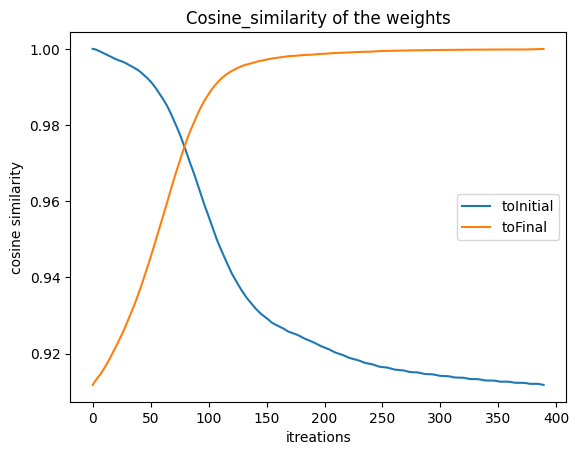

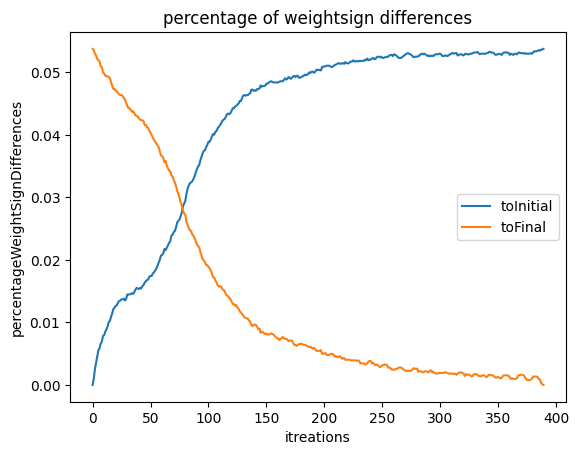

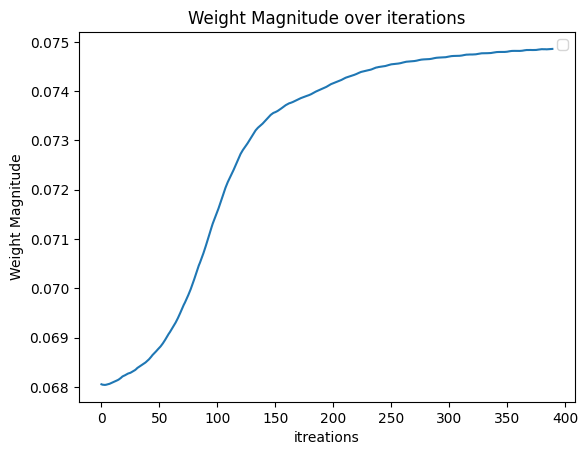

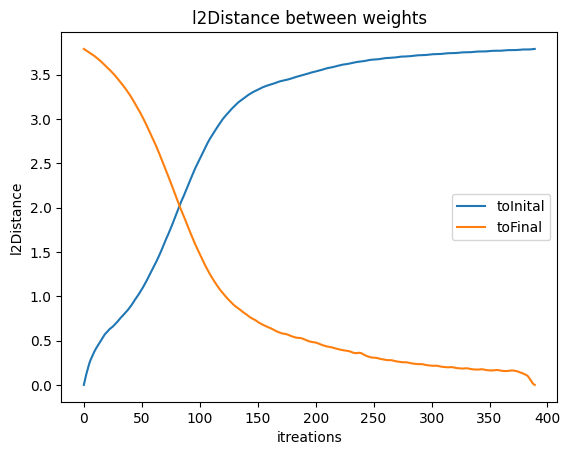

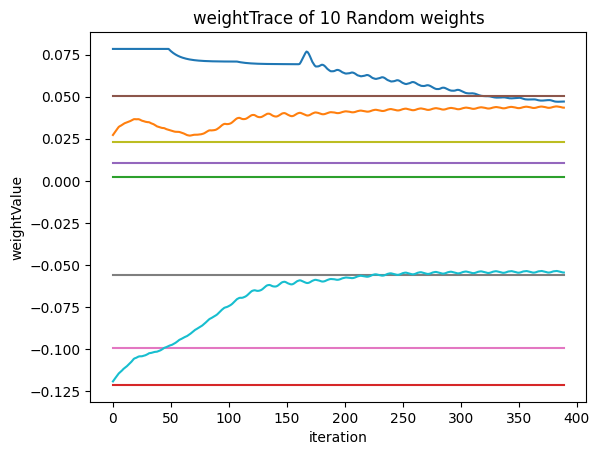

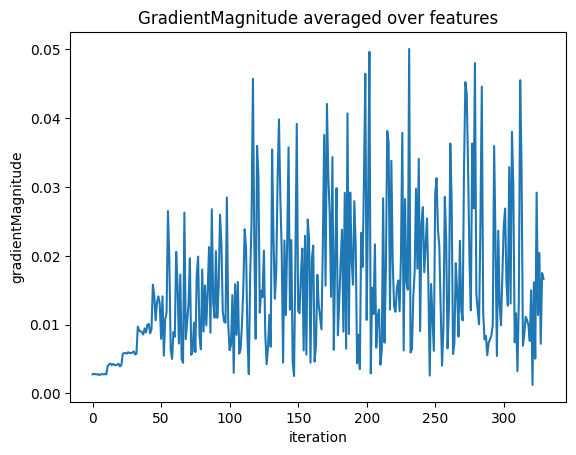

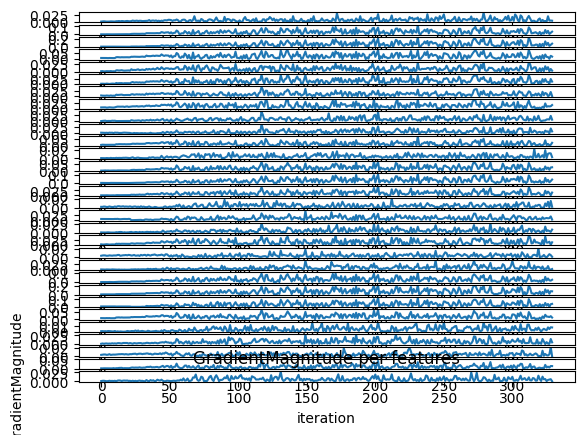

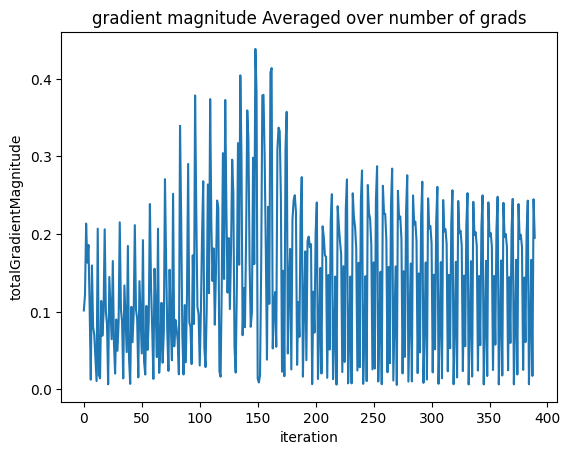

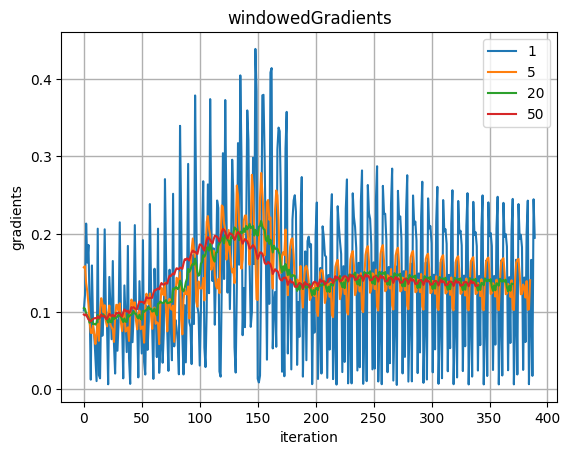

In [2]:
import utils
if datasetType == "NLP":
    dataPath= dirPath+ "NLP_Results/Trainingresults/"
else:
    dataPath= dirPath+ "Results/Trainingresults/"
utils.appendToNPZ(dataPath+ "data.npz", "Total_gradientsList_iteration", total_gradientsList)
data = utils.loadData(dataPath+ "data.npz")


plotResults.plotTrainingResults(data, dataPath)

In [3]:
import cega_utils
from datetime import datetime
import numpy as np

datasetType = "numerical"
now = datetime.now()
date_time_string = now.strftime("%Y-%m-%d %H:%M:%S")
# Replace space with underscore
date_time_string = date_time_string.replace(" ", "_")

pathToNPZ =  cega_utils.runCEGA(dirPath, modelsDirPath, model, X_test, device, data,date_time_string, testloader , datasetType)





numerical


  0%|          | 0/390 [00:00<?, ?it/s]

--------------
1.0
0.08992094861660081
--------------


  0%|          | 1/390 [00:00<02:49,  2.30it/s]

13
46
--
(171, 46)
--------------
1.0
0.11038961038961041
--------------


  1%|          | 2/390 [00:00<02:43,  2.38it/s]

26
70
--
(171, 70)
--------------
1.0
0.11768368617683682
--------------


  1%|          | 3/390 [00:01<03:09,  2.04it/s]

29
73
--
(171, 73)
--------------
1.0
0.1239669421487603
--------------


  1%|          | 4/390 [00:01<02:57,  2.17it/s]

29
66
--
(171, 66)
--------------
1.0
0.11965240641711228
--------------


  1%|▏         | 5/390 [00:02<02:51,  2.25it/s]

30
68
--
(171, 68)
--------------
1.0
0.11425061425061424
--------------


  2%|▏         | 6/390 [00:02<03:08,  2.04it/s]

36
74
--
(171, 74)
--------------
1.0
0.10955710955710951
--------------


  2%|▏         | 7/390 [00:03<03:08,  2.03it/s]

42
78
--
(171, 78)
--------------
1.0
0.11602870813397127
--------------


  2%|▏         | 8/390 [00:03<03:20,  1.91it/s]

43
76
--
(171, 76)
--------------
1.0
0.11850649350649348
--------------


  2%|▏         | 9/390 [00:04<03:39,  1.74it/s]

50
84
--
(171, 84)
--------------
1.0
0.12121212121212117
--------------


  3%|▎         | 10/390 [00:05<03:34,  1.77it/s]

47
81
--
(171, 81)
--------------
1.0
0.11688311688311684
--------------


  3%|▎         | 11/390 [00:05<03:47,  1.66it/s]

51
84
--
(171, 84)
--------------
1.0
0.11593462717058221
--------------


  3%|▎         | 12/390 [00:06<04:01,  1.56it/s]

53
89
--
(171, 89)
--------------
1.0
0.11880165289256195
--------------


  3%|▎         | 13/390 [00:07<03:57,  1.59it/s]

54
88
--
(171, 88)
--------------
1.0
0.11166007905138337
--------------


  4%|▎         | 14/390 [00:07<04:09,  1.51it/s]

56
92
--
(171, 92)
--------------
1.0
0.12053115423901938
--------------


  4%|▍         | 15/390 [00:08<04:18,  1.45it/s]

57
89
--
(171, 89)
--------------
1.0
0.12137862137862133
--------------


  4%|▍         | 16/390 [00:09<04:26,  1.41it/s]

58
91
--
(171, 91)
--------------
1.0
0.12316715542521989
--------------


  4%|▍         | 17/390 [00:10<04:49,  1.29it/s]

60
93
--
(171, 93)
--------------
1.0
0.12379110251450672
--------------


  5%|▍         | 18/390 [00:11<04:58,  1.25it/s]

64
94
--
(171, 94)
--------------
1.0
0.12026515151515149
--------------


  5%|▍         | 19/390 [00:12<05:03,  1.22it/s]

65
96
--
(171, 96)
--------------
1.0
0.12450592885375489
--------------


  5%|▌         | 20/390 [00:12<05:05,  1.21it/s]

63
92
--
(171, 92)
--------------
1.0
0.11902530459231486
--------------


  5%|▌         | 21/390 [00:13<05:24,  1.14it/s]

67
97
--
(171, 97)
--------------
1.0
0.12344497607655495
--------------


  6%|▌         | 22/390 [00:14<05:20,  1.15it/s]

64
95
--
(171, 95)
--------------
1.0
0.11983471074380161
--------------


  6%|▌         | 23/390 [00:15<05:22,  1.14it/s]

67
99
--
(171, 99)
--------------
1.0
0.1256109481915933
--------------


  6%|▌         | 24/390 [00:16<05:15,  1.16it/s]

62
93
--
(171, 93)
--------------
1.0
0.12598814229249006
--------------


  6%|▋         | 25/390 [00:17<05:10,  1.17it/s]

64
92
--
(171, 92)
--------------
1.0
0.12887112887112884
--------------


  7%|▋         | 26/390 [00:18<05:11,  1.17it/s]

63
91
--
(171, 91)
--------------
1.0
0.13036963036963034
--------------


  7%|▋         | 27/390 [00:19<05:24,  1.12it/s]

63
91
--
(171, 91)
--------------
1.0
0.12452651515151512
--------------


  7%|▋         | 28/390 [00:20<05:28,  1.10it/s]

67
96
--
(171, 96)
--------------
1.0
0.12615955473098325
--------------


  7%|▋         | 29/390 [00:21<05:43,  1.05it/s]

64
98
--
(171, 98)
--------------
1.0
0.12442607897153349
--------------


  8%|▊         | 30/390 [00:22<05:46,  1.04it/s]

67
99
--
(171, 99)
--------------
1.0
0.1276400367309458
--------------


  8%|▊         | 31/390 [00:23<05:47,  1.03it/s]

67
99
--
(171, 99)
--------------
1.0
0.12727272727272723
--------------


  8%|▊         | 32/390 [00:24<06:11,  1.04s/it]

67
100
--
(171, 100)
--------------
1.0
0.12753751103265662
--------------


  8%|▊         | 33/390 [00:25<06:23,  1.07s/it]

69
103
--
(171, 103)
--------------
1.0
0.12909090909090903
--------------


  9%|▊         | 34/390 [00:26<06:36,  1.11s/it]

68
100
--
(171, 100)
--------------
1.0
0.12700534759358284
--------------


  9%|▉         | 35/390 [00:27<06:29,  1.10s/it]

69
102
--
(171, 102)
--------------
1.0
0.12855831037649218
--------------


  9%|▉         | 36/390 [00:28<06:26,  1.09s/it]

65
99
--
(171, 99)
--------------
1.0
0.1237623762376237
--------------


  9%|▉         | 37/390 [00:29<06:12,  1.06s/it]

66
101
--
(171, 101)
--------------
1.0
0.12834224598930477
--------------


 10%|▉         | 38/390 [00:30<06:24,  1.09s/it]

67
102
--
(171, 102)
--------------
0.9975961538461539
0.1284965034965035
--------------


 10%|█         | 39/390 [00:31<06:14,  1.07s/it]

66
104
--
(171, 104)
--------------
1.0
0.1271853146853147
--------------


 10%|█         | 40/390 [00:33<06:27,  1.11s/it]

68
104
--
(171, 104)
--------------
1.0
0.13085399449035812
--------------


 11%|█         | 41/390 [00:34<06:16,  1.08s/it]

66
99
--
(171, 99)
--------------
1.0
0.1277272727272727
--------------


 11%|█         | 42/390 [00:35<06:18,  1.09s/it]

64
100
--
(171, 100)
--------------
1.0
0.1303948576675849
--------------


 11%|█         | 43/390 [00:36<06:08,  1.06s/it]

66
99
--
(171, 99)
--------------
1.0
0.1307977736549165
--------------


 11%|█▏        | 44/390 [00:37<06:15,  1.09s/it]

66
98
--
(171, 98)
--------------
1.0
0.12993572084481173
--------------


 12%|█▏        | 45/390 [00:38<06:03,  1.05s/it]

67
99
--
(171, 99)
--------------
1.0
0.12993572084481173
--------------


 12%|█▏        | 46/390 [00:39<06:12,  1.08s/it]

66
99
--
(171, 99)
--------------
1.0
0.1316776007497657
--------------


 12%|█▏        | 47/390 [00:40<06:03,  1.06s/it]

67
97
--
(171, 97)
--------------
1.0
0.13051305130513047
--------------


 12%|█▏        | 48/390 [00:41<06:17,  1.10s/it]

70
101
--
(171, 101)
--------------
0.9975247524752475
0.13141314131413137
--------------


 13%|█▎        | 49/390 [00:42<06:26,  1.13s/it]

67
101
--
(171, 101)
--------------
1.0
0.13057040998217465
--------------


 13%|█▎        | 50/390 [00:44<06:16,  1.11s/it]

66
102
--
(171, 102)
--------------
0.998397435897436
0.1324300699300699
--------------


 13%|█▎        | 51/390 [00:45<06:30,  1.15s/it]

69
104
--
(171, 104)
--------------
1.0
0.1281385281385281
--------------


 13%|█▎        | 52/390 [00:46<06:25,  1.14s/it]

69
105
--
(171, 105)
--------------
1.0
0.1315092674315975
--------------


 14%|█▎        | 53/390 [00:47<06:31,  1.16s/it]

66
103
--
(171, 103)
--------------
1.0
0.12778730703259003
--------------


 14%|█▍        | 54/390 [00:48<06:23,  1.14s/it]

70
106
--
(171, 106)
--------------
0.9988207547169812
0.1295025728987993
--------------


 14%|█▍        | 55/390 [00:49<06:32,  1.17s/it]

71
106
--
(171, 106)
--------------
1.0
0.13024475524475523
--------------


 14%|█▍        | 56/390 [00:51<06:20,  1.14s/it]

69
104
--
(171, 104)
--------------
1.0
0.13726372637263723
--------------


 15%|█▍        | 57/390 [00:52<06:27,  1.16s/it]

69
101
--
(171, 101)
--------------
1.0
0.1296914095079232
--------------


 15%|█▍        | 58/390 [00:53<06:40,  1.21s/it]

73
109
--
(171, 109)
--------------
0.9968253968253968
0.13131313131313127
--------------


 15%|█▌        | 59/390 [00:54<06:32,  1.18s/it]

73
108
--
(171, 108)
--------------
1.0
0.13336192109777012
--------------


 15%|█▌        | 60/390 [00:55<06:43,  1.22s/it]

72
106
--
(171, 106)
--------------
0.9981651376146788
0.12927439532944118
--------------


 16%|█▌        | 61/390 [00:57<06:49,  1.25s/it]

75
109
--
(171, 109)
--------------
1.0
0.13078902229845624
--------------


 16%|█▌        | 62/390 [00:58<06:52,  1.26s/it]

72
106
--
(171, 106)
--------------
0.9953703703703703
0.13047138047138043
--------------


 16%|█▌        | 63/390 [00:59<06:55,  1.27s/it]

73
108
--
(171, 108)
--------------
0.9986648865153538
0.1308411214953271
--------------


 16%|█▋        | 64/390 [01:01<06:59,  1.29s/it]

75
107
--
(171, 107)
--------------
0.9981132075471698
0.13036020583190394
--------------


 17%|█▋        | 65/390 [01:02<06:57,  1.29s/it]

71
106
--
(171, 106)
--------------
0.9984709480122325
0.12802335279399496
--------------


 17%|█▋        | 66/390 [01:03<06:59,  1.29s/it]

75
109
--
(171, 109)
--------------
0.9959546925566344
0.1288614298323036
--------------


 17%|█▋        | 67/390 [01:05<07:00,  1.30s/it]

71
103
--
(171, 103)
--------------
1.0
0.1299313893653516
--------------


 17%|█▋        | 68/390 [01:06<06:45,  1.26s/it]

72
106
--
(171, 106)
--------------
0.9940476190476191
0.12626262626262624
--------------


 18%|█▊        | 69/390 [01:07<06:48,  1.27s/it]

75
108
--
(171, 108)
--------------
1.0
0.13499999999999995
--------------


 18%|█▊        | 70/390 [01:08<06:46,  1.27s/it]

70
100
--
(171, 100)
--------------
0.993556138051551
0.1288573811509591
--------------


 18%|█▊        | 71/390 [01:10<06:54,  1.30s/it]

73
109
--
(171, 109)
--------------
0.9950757575757576
0.12933884297520656
--------------


 18%|█▊        | 72/390 [01:11<07:03,  1.33s/it]

79
110
--
(171, 110)
--------------
1.0
0.12802335279399496
--------------


 19%|█▊        | 73/390 [01:12<06:52,  1.30s/it]

76
109
--
(171, 109)
--------------
0.9855024832018697
0.10987172336865587
--------------


 19%|█▉        | 74/390 [01:14<07:18,  1.39s/it]

112
163
--
(171, 163)
--------------
0.9911420500403552
0.12134052388289672
--------------


 19%|█▉        | 75/390 [01:15<07:21,  1.40s/it]

85
118
--
(171, 118)
--------------
0.9872986694677872
0.10995989304812834
--------------


 19%|█▉        | 76/390 [01:17<07:33,  1.44s/it]

105
136
--
(171, 136)
--------------
0.9964622641509434
0.1273584905660377
--------------


 20%|█▉        | 77/390 [01:18<07:20,  1.41s/it]

73
106
--
(171, 106)
--------------
0.9887672811059908
0.1140029325513196
--------------


 20%|██        | 78/390 [01:19<06:58,  1.34s/it]

82
124
--
(171, 124)
--------------
0.9918984962406016
0.1007177033492823
--------------


 20%|██        | 79/390 [01:21<07:38,  1.47s/it]

143
190
--
(171, 190)
--------------
0.9868783068783069
0.11548821548821549
--------------


 21%|██        | 80/390 [01:23<07:46,  1.50s/it]

103
135
--
(171, 135)
--------------
0.9848335269066977
0.09866962305986696
--------------


 21%|██        | 81/390 [01:25<08:35,  1.67s/it]

200
246
--
(171, 246)
--------------
0.9878663003663003
0.12027972027972027
--------------


 21%|██        | 82/390 [01:26<08:01,  1.56s/it]

90
130
--
(171, 130)
--------------
0.9911186696900982
0.11580086580086577
--------------


 21%|██▏       | 83/390 [01:28<07:54,  1.55s/it]

89
126
--
(171, 126)
--------------
0.9891787852865698
0.10642351660315733
--------------


 22%|██▏       | 84/390 [01:29<08:07,  1.59s/it]

129
167
--
(171, 167)
--------------
0.995305845915602
0.1178861788617886
--------------


 22%|██▏       | 85/390 [01:31<08:16,  1.63s/it]

85
123
--
(171, 123)
--------------
0.9914554531490015
0.11253665689149556
--------------


 22%|██▏       | 86/390 [01:32<07:45,  1.53s/it]

91
124
--
(171, 124)
--------------
0.985576441102757
0.09186602870813397
--------------


 22%|██▏       | 87/390 [01:35<09:18,  1.84s/it]

202
285
--
(171, 285)
--------------
0.9816617063492064
0.0895833333333333
--------------


 23%|██▎       | 88/390 [01:37<09:12,  1.83s/it]

137
240
--
(171, 240)
--------------
0.9848645181978515
0.08019589837771657
--------------


 23%|██▎       | 89/390 [01:39<09:56,  1.98s/it]

220
297
--
(171, 297)
--------------
0.991294956801286
0.09225163022631377
--------------


 23%|██▎       | 90/390 [01:41<09:52,  1.97s/it]

149
237
--
(171, 237)
--------------
0.9805721393034826
0.08127544097693351
--------------


 23%|██▎       | 91/390 [01:43<10:15,  2.06s/it]

214
335
--
(171, 335)
--------------
0.982312362030905
0.09166164960866949
--------------


 24%|██▎       | 92/390 [01:46<10:27,  2.11s/it]

207
302
--
(171, 302)
--------------
0.9874204227145404
0.09795819154107921
--------------


 24%|██▍       | 93/390 [01:47<09:53,  2.00s/it]

109
187
--
(171, 187)
--------------
0.9812899786780384
0.08090230664857528
--------------


 24%|██▍       | 94/390 [01:49<10:10,  2.06s/it]

211
268
--
(171, 268)
--------------
0.9802000000000001
0.0878181818181818
--------------


 24%|██▍       | 95/390 [01:51<09:57,  2.03s/it]

153
250
--
(171, 250)
--------------
0.9891694936549817
0.08083473254977212
--------------


 25%|██▍       | 96/390 [01:54<10:57,  2.24s/it]

269
379
--
(171, 379)
--------------
0.9783627087198515
0.07438016528925619
--------------


 25%|██▍       | 97/390 [01:57<11:08,  2.28s/it]

222
308
--
(171, 308)
--------------
0.9801028954295284
0.09159433531292828
--------------


 25%|██▌       | 98/390 [01:58<10:14,  2.11s/it]

136
199
--
(171, 199)
--------------
0.9891297208538588
0.080564263322884
--------------


 25%|██▌       | 99/390 [02:00<10:26,  2.15s/it]

212
290
--
(171, 290)
--------------
0.9858932223196027
0.07459564974902398
--------------


 26%|██▌       | 100/390 [02:03<10:48,  2.24s/it]

227
326
--
(171, 326)
--------------
0.988496844520941
0.08232931726907627
--------------


 26%|██▌       | 101/390 [02:05<10:34,  2.20s/it]

183
249
--
(171, 249)
--------------
0.980075016307893
0.08592777085927772
--------------


 26%|██▌       | 102/390 [02:08<10:59,  2.29s/it]

228
365
--
(171, 365)
--------------
0.9886535746374021
0.07730948296986033
--------------


 26%|██▋       | 103/390 [02:10<11:27,  2.39s/it]

240
371
--
(171, 371)
--------------
0.9856326171629601
0.08479251619093309
--------------


 27%|██▋       | 104/390 [02:13<11:40,  2.45s/it]

289
379
--
(171, 379)
--------------
0.9907049282595134
0.08277094084954346
--------------


 27%|██▋       | 105/390 [02:15<10:59,  2.31s/it]

155
229
--
(171, 229)
--------------
0.9860119047619048
0.08208296557811119
--------------


 27%|██▋       | 106/390 [02:18<11:50,  2.50s/it]

254
412
--
(171, 412)
--------------
0.9933035714285714
0.08638139204545452
--------------


 27%|██▋       | 107/390 [02:21<12:43,  2.70s/it]

357
512
--
(171, 512)
--------------
0.9861399711399711
0.10936639118457299
--------------


 28%|██▊       | 108/390 [02:23<11:49,  2.52s/it]

131
165
--
(171, 165)
--------------
0.9891650793650794
0.09757575757575758
--------------


 28%|██▊       | 109/390 [02:26<11:53,  2.54s/it]

280
375
--
(171, 375)
--------------
0.9839972527472528
0.071131993006993
--------------


 28%|██▊       | 110/390 [02:28<12:19,  2.64s/it]

309
416
--
(171, 416)
--------------
0.9930224867724868
0.06644570707070709
--------------


 28%|██▊       | 111/390 [02:30<11:21,  2.44s/it]

189
288
--
(171, 288)
--------------
0.983753306878307
0.09621212121212122
--------------


 29%|██▊       | 112/390 [02:33<11:34,  2.50s/it]

263
360
--
(171, 360)
--------------
0.9867820665870805
0.07951380096226894
--------------


 29%|██▉       | 113/390 [02:35<11:31,  2.50s/it]

239
359
--
(171, 359)
--------------
0.9781756844427145
0.0885558583106267
--------------


 29%|██▉       | 114/390 [02:38<11:27,  2.49s/it]

272
367
--
(171, 367)
--------------
0.988566771451857
0.07935096688152922
--------------


 29%|██▉       | 115/390 [02:41<11:43,  2.56s/it]

257
409
--
(171, 409)
--------------
0.9877752796033669
0.07120845256438475
--------------


 30%|██▉       | 116/390 [02:43<11:42,  2.56s/it]

267
413
--
(171, 413)
--------------
0.9913964876730834
0.06608639587362991
--------------


 30%|███       | 117/390 [02:45<11:07,  2.44s/it]

187
282
--
(171, 282)
--------------
0.9762453684643887
0.0733560387739062
--------------


 30%|███       | 118/390 [02:48<11:14,  2.48s/it]

233
347
--
(171, 347)
--------------
0.9924311577666212
0.05896020911995353
--------------


 31%|███       | 119/390 [02:50<11:03,  2.45s/it]

240
313
--
(171, 313)
--------------
0.9864882429398558
0.08143469433792014
--------------


 31%|███       | 120/390 [02:53<11:26,  2.54s/it]

291
403
--
(171, 403)
--------------
0.985692527663807
0.0651554711606931
--------------


 31%|███       | 121/390 [02:56<11:13,  2.50s/it]

245
383
--
(171, 383)
--------------
0.9821428571428571
0.08092031425364757
--------------


 31%|███▏      | 122/390 [02:58<11:39,  2.61s/it]

292
405
--
(171, 405)
--------------
0.9710461386627189
0.07595383890720676
--------------


 32%|███▏      | 123/390 [03:01<11:17,  2.54s/it]

206
386
--
(171, 386)
--------------
0.9899111584932481
0.09511533242876527
--------------


 32%|███▏      | 124/390 [03:03<11:14,  2.53s/it]

247
335
--
(171, 335)
--------------
0.9749337022944772
0.06823684789786483
--------------


 32%|███▏      | 125/390 [03:06<11:26,  2.59s/it]

256
413
--
(171, 413)
--------------
0.9876738305941846
0.07079646017699114
--------------


 32%|███▏      | 126/390 [03:09<11:48,  2.68s/it]

333
452
--
(171, 452)
--------------
0.9867718303202174
0.06632077599819534
--------------


 33%|███▎      | 127/390 [03:12<11:43,  2.68s/it]

269
403
--
(171, 403)
--------------
0.989901198574668
0.06854256854256853
--------------


 33%|███▎      | 128/390 [03:14<11:19,  2.59s/it]

175
441
--
(171, 441)
--------------
0.9791842206051321
0.0856690226663417
--------------


 33%|███▎      | 129/390 [03:16<11:11,  2.57s/it]

240
373
--
(171, 373)
--------------
0.9912914449447401
0.06863766605886949
--------------


 33%|███▎      | 130/390 [03:19<10:42,  2.47s/it]

213
349
--
(171, 349)
--------------
0.9867171006333568
0.06459919390953874
--------------


 34%|███▎      | 131/390 [03:21<10:55,  2.53s/it]

243
406
--
(171, 406)
--------------
0.9710751940678947
0.0723291307232913
--------------


 34%|███▍      | 132/390 [03:24<10:47,  2.51s/it]

255
411
--
(171, 411)
--------------
0.9775510204081632
0.07838589981447124
--------------


 34%|███▍      | 133/390 [03:27<11:00,  2.57s/it]

288
392
--
(171, 392)
--------------
0.9859652509652509
0.07837837837837837
--------------


 34%|███▍      | 134/390 [03:29<10:59,  2.57s/it]

230
370
--
(171, 370)
--------------
0.9695914914189026
0.09760036917397323
--------------


 35%|███▍      | 135/390 [03:31<09:45,  2.30s/it]

143
197
--
(171, 197)
--------------
0.9846409674981105
0.06551226551226551
--------------


 35%|███▍      | 136/390 [03:33<09:32,  2.25s/it]

205
315
--
(171, 315)
--------------
0.987930807682189
0.06680060271220492
--------------


 35%|███▌      | 137/390 [03:36<09:58,  2.36s/it]

236
362
--
(171, 362)
--------------
0.9836638776985849
0.07020311575626108
--------------


 35%|███▌      | 138/390 [03:38<10:35,  2.52s/it]

311
461
--
(171, 461)
--------------
0.9812767613857533
0.08038147138964577
--------------


 36%|███▌      | 139/390 [03:41<10:07,  2.42s/it]

169
367
--
(171, 367)
--------------
0.9824850824850825
0.07985257985257985
--------------


 36%|███▌      | 140/390 [03:43<10:28,  2.52s/it]

280
407
--
(171, 407)
--------------
0.9866263736263736
0.06531468531468532
--------------


 36%|███▌      | 141/390 [03:45<09:50,  2.37s/it]

148
325
--
(171, 325)
--------------
0.974172335600907
0.06948051948051948
--------------


 36%|███▋      | 142/390 [03:48<10:15,  2.48s/it]

218
420
--
(171, 420)
--------------
0.9794360202181432
0.0707211782630777
--------------


 37%|███▋      | 143/390 [03:51<10:20,  2.51s/it]

225
358
--
(171, 358)
--------------
0.9896003633060854
0.06589051275699777
--------------


 37%|███▋      | 144/390 [03:53<10:10,  2.48s/it]

256
367
--
(171, 367)
--------------
0.9681284764618098
0.0881895881895882
--------------


 37%|███▋      | 145/390 [03:56<09:58,  2.44s/it]

239
351
--
(171, 351)
--------------
0.9790541422048271
0.07733499377334993
--------------


 37%|███▋      | 146/390 [03:58<10:07,  2.49s/it]

256
365
--
(171, 365)
--------------
0.9831253420908593
0.06886102403343781
--------------


 38%|███▊      | 147/390 [04:01<10:22,  2.56s/it]

320
435
--
(171, 435)
--------------
0.9718608058608059
0.06699300699300699
--------------


 38%|███▊      | 148/390 [04:03<10:09,  2.52s/it]

213
325
--
(171, 325)
--------------
0.9681307746979388
0.07394843962008141
--------------


 38%|███▊      | 149/390 [04:05<09:34,  2.38s/it]

165
335
--
(171, 335)
--------------
0.982444814660558
0.06546514709780017
--------------


 38%|███▊      | 150/390 [04:08<09:41,  2.42s/it]

201
343
--
(171, 343)
--------------
0.9805341055341055
0.08039858039858039
--------------


 39%|███▊      | 151/390 [04:10<09:43,  2.44s/it]

223
333
--
(171, 333)
--------------
0.9885247136829416
0.09723820483314155
--------------


 39%|███▉      | 152/390 [04:12<09:20,  2.36s/it]

207
316
--
(171, 316)
--------------
0.9763142263142263
0.07295407295407293
--------------


 39%|███▉      | 153/390 [04:16<10:10,  2.58s/it]

336
481
--
(171, 481)
--------------
0.9874481718808895
0.06500359798512834
--------------


 39%|███▉      | 154/390 [04:18<09:51,  2.50s/it]

226
379
--
(171, 379)
--------------
0.9836331354057515
0.07046010224494331
--------------


 40%|███▉      | 155/390 [04:21<09:57,  2.54s/it]

190
409
--
(171, 409)
--------------
0.9841244725738397
0.07911392405063292
--------------


 40%|████      | 156/390 [04:23<10:04,  2.58s/it]

242
474
--
(171, 474)
--------------
0.9784461152882205
0.06687172476646161
--------------


 40%|████      | 157/390 [04:26<09:46,  2.52s/it]

195
399
--
(171, 399)
--------------
0.9834242724867726
0.0648148148148148
--------------


 41%|████      | 158/390 [04:28<10:08,  2.62s/it]

290
432
--
(171, 432)
--------------
0.9753370297890845
0.09090909090909091
--------------


 41%|████      | 159/390 [04:31<10:30,  2.73s/it]

302
438
--
(171, 438)
--------------
0.9922243966079584
0.05778331257783313
--------------


 41%|████      | 160/390 [04:34<09:57,  2.60s/it]

207
365
--
(171, 365)
--------------
0.9902017195767195
0.06262626262626263
--------------


 41%|████▏     | 161/390 [04:36<09:29,  2.49s/it]

204
360
--
(171, 360)
--------------
0.9862111240160022
0.07526484355752648
--------------


 42%|████▏     | 162/390 [04:39<09:39,  2.54s/it]

264
369
--
(171, 369)
--------------
0.9837784972345879
0.0701776976564512
--------------


 42%|████▏     | 163/390 [04:41<09:41,  2.56s/it]

213
353
--
(171, 353)
--------------
0.9663417550426284
0.07721317983326716
--------------


 42%|████▏     | 164/390 [04:44<09:52,  2.62s/it]

288
458
--
(171, 458)
--------------
0.98143584944895
0.0668916236601826
--------------


 42%|████▏     | 165/390 [04:47<10:07,  2.70s/it]

254
458
--
(171, 458)
--------------
0.9747430887248515
0.07654048079579993
--------------


 43%|████▎     | 166/390 [04:49<09:25,  2.52s/it]

214
329
--
(171, 329)
--------------
0.9824784080298786
0.0694073083778966
--------------


 43%|████▎     | 167/390 [04:52<09:25,  2.53s/it]

274
408
--
(171, 408)
--------------
0.9728253968253968
0.08193939393939394
--------------


 43%|████▎     | 168/390 [04:54<09:26,  2.55s/it]

226
375
--
(171, 375)
--------------
0.9853885528152629
0.062481492448919165
--------------


 43%|████▎     | 169/390 [04:56<08:49,  2.40s/it]

186
307
--
(171, 307)
--------------
0.9828246753246754
0.07469008264462809
--------------


 44%|████▎     | 170/390 [04:59<09:07,  2.49s/it]

287
440
--
(171, 440)
--------------
0.9884052579365079
0.06096117424242423
--------------


 44%|████▍     | 171/390 [05:02<09:21,  2.57s/it]

257
384
--
(171, 384)
--------------
0.982119283356907
0.07065706570657064
--------------


 44%|████▍     | 172/390 [05:04<09:31,  2.62s/it]

246
404
--
(171, 404)
--------------
0.9800242130750606
0.07126348228043143
--------------


 44%|████▍     | 173/390 [05:07<09:15,  2.56s/it]

233
354
--
(171, 354)
--------------
0.9861143373338495
0.0666420300566642
--------------


 45%|████▍     | 174/390 [05:09<08:59,  2.50s/it]

248
369
--
(171, 369)
--------------
0.9884131493506494
0.0603047520661157
--------------


 45%|████▍     | 175/390 [05:12<08:51,  2.47s/it]

170
352
--
(171, 352)
--------------
0.9860820979335131
0.06732418524871353
--------------


 45%|████▌     | 176/390 [05:14<08:57,  2.51s/it]

253
424
--
(171, 424)
--------------
0.9817480109250682
0.0642711403309907
--------------


 45%|████▌     | 177/390 [05:17<09:14,  2.61s/it]

264
401
--
(171, 401)
--------------
0.9755346607669616
0.07401448109412709
--------------


 46%|████▌     | 178/390 [05:20<09:28,  2.68s/it]

323
452
--
(171, 452)
--------------
0.9880838186593582
0.09385219097449311
--------------


 46%|████▌     | 179/390 [05:23<09:41,  2.76s/it]

266
417
--
(171, 417)
--------------
0.973484492481203
0.072816985645933
--------------


 46%|████▌     | 180/390 [05:25<09:13,  2.64s/it]

177
304
--
(171, 304)
--------------
0.9831650592726542
0.08247027234369006
--------------


 46%|████▋     | 181/390 [05:28<09:17,  2.67s/it]

220
474
--
(171, 474)
--------------
0.9752796901893287
0.07735487404162103
--------------


 47%|████▋     | 182/390 [05:30<08:40,  2.50s/it]

171
332
--
(171, 332)
--------------
0.9901834965664753
0.05716741886954653
--------------


 47%|████▋     | 183/390 [05:33<09:08,  2.65s/it]

289
423
--
(171, 423)
--------------
0.9796560846560846
0.07676767676767675
--------------


 47%|████▋     | 184/390 [05:36<09:16,  2.70s/it]

324
450
--
(171, 450)
--------------
0.978117048346056
0.06465417534119823
--------------


 47%|████▋     | 185/390 [05:38<09:01,  2.64s/it]

247
393
--
(171, 393)
--------------
0.9824937343358396
0.0604066985645933
--------------


 48%|████▊     | 186/390 [05:41<08:57,  2.63s/it]

210
380
--
(171, 380)
--------------
0.9679591836734693
0.07294372294372294
--------------


 48%|████▊     | 187/390 [05:44<08:58,  2.65s/it]

298
420
--
(171, 420)
--------------
0.9763631132211192
0.0806097226036803
--------------


 48%|████▊     | 188/390 [05:46<08:45,  2.60s/it]

191
331
--
(171, 331)
--------------
0.9910834535834536
0.059458218549127646
--------------


 48%|████▊     | 189/390 [05:49<08:37,  2.57s/it]

229
396
--
(171, 396)
--------------
0.9803037960467206
0.0725771869639794
--------------


 49%|████▊     | 190/390 [05:52<08:58,  2.69s/it]

307
424
--
(171, 424)
--------------
0.9800978179082017
0.07038785142622613
--------------


 49%|████▉     | 191/390 [05:54<08:54,  2.68s/it]

249
443
--
(171, 443)
--------------
0.9716190476190476
0.07535353535353533
--------------


 49%|████▉     | 192/390 [05:57<08:54,  2.70s/it]

293
450
--
(171, 450)
--------------
0.98916515973478
0.06012658227848102
--------------


 49%|████▉     | 193/390 [05:59<08:36,  2.62s/it]

189
316
--
(171, 316)
--------------
0.9855836598978743
0.07277261391974607
--------------


 50%|████▉     | 194/390 [06:02<08:30,  2.61s/it]

294
401
--
(171, 401)
--------------
0.983687707641196
0.07346723044397462
--------------


 50%|█████     | 195/390 [06:05<08:41,  2.67s/it]

299
430
--
(171, 430)
--------------
0.9685294117647059
0.08141711229946523
--------------


 50%|█████     | 196/390 [06:07<08:05,  2.50s/it]

141
340
--
(171, 340)
--------------
0.9872323003275384
0.06024531024531025
--------------


 51%|█████     | 197/390 [06:10<08:17,  2.58s/it]

251
378
--
(171, 378)
--------------
0.9826271716035496
0.06430446194225722
--------------


 51%|█████     | 198/390 [06:12<08:14,  2.58s/it]

265
381
--
(171, 381)
--------------
0.9887424872861766
0.06409973521624006
--------------


 51%|█████     | 199/390 [06:15<08:06,  2.55s/it]

214
412
--
(171, 412)
--------------
0.9925030978934325
0.058803649881716796
--------------


 51%|█████▏    | 200/390 [06:17<07:50,  2.47s/it]

205
269
--
(171, 269)
--------------
0.9919094304388423
0.09857397504456326
--------------


 52%|█████▏    | 201/390 [06:19<07:19,  2.32s/it]

155
255
--
(171, 255)
--------------
0.9820887445887446
0.06700118063754427
--------------


 52%|█████▏    | 202/390 [06:21<07:15,  2.32s/it]

156
308
--
(171, 308)
--------------
0.9760687661646127
0.07232065059541097
--------------


 52%|█████▏    | 203/390 [06:23<06:58,  2.24s/it]

141
313
--
(171, 313)
--------------
0.9800984051577876
0.0649967609587562
--------------


 52%|█████▏    | 204/390 [06:26<07:15,  2.34s/it]

218
421
--
(171, 421)
--------------
0.9822140269151138
0.06422924901185771
--------------


 53%|█████▎    | 205/390 [06:29<07:32,  2.45s/it]

231
368
--
(171, 368)
--------------
0.976625533934504
0.06840833585019632
--------------


 53%|█████▎    | 206/390 [06:31<07:11,  2.35s/it]

186
301
--
(171, 301)
--------------
0.9850123539982031
0.06485849056603774
--------------


 53%|█████▎    | 207/390 [06:33<07:18,  2.40s/it]

224
424
--
(171, 424)
--------------
0.975485633346823
0.07275302601081637
--------------


 53%|█████▎    | 208/390 [06:36<07:28,  2.46s/it]

202
353
--
(171, 353)
--------------
0.989593837535014
0.058556149732620334
--------------


 54%|█████▎    | 209/390 [06:38<07:13,  2.40s/it]

191
340
--
(171, 340)
--------------
0.9715203604806409
0.0723237043330501
--------------


 54%|█████▍    | 210/390 [06:41<07:25,  2.47s/it]

280
428
--
(171, 428)
--------------
0.9711904761904763
0.07657342657342657
--------------


 54%|█████▍    | 211/390 [06:44<07:44,  2.60s/it]

284
390
--
(171, 390)
--------------
0.9802910052910053
0.06587615283267456
--------------


 54%|█████▍    | 212/390 [06:46<07:48,  2.63s/it]

276
414
--
(171, 414)
--------------
0.9778856107660456
0.07448122529644267
--------------


 55%|█████▍    | 213/390 [06:49<07:52,  2.67s/it]

224
368
--
(171, 368)
--------------
0.9826355735096095
0.07104463659733581
--------------


 55%|█████▍    | 214/390 [06:52<07:41,  2.62s/it]

226
389
--
(171, 389)
--------------
0.9762109135499694
0.06418259851736245
--------------


 55%|█████▌    | 215/390 [06:55<07:59,  2.74s/it]

320
466
--
(171, 466)
--------------
0.9844789915966387
0.07689839572192511
--------------


 55%|█████▌    | 216/390 [06:58<08:12,  2.83s/it]

314
425
--
(171, 425)
--------------
0.981423723335488
0.0706499382969971
--------------


 56%|█████▌    | 217/390 [07:01<08:16,  2.87s/it]

346
442
--
(171, 442)
--------------
0.9764227642276422
0.06638026607538802
--------------


 56%|█████▌    | 218/390 [07:03<07:37,  2.66s/it]

160
328
--
(171, 328)
--------------
0.9834247017091261
0.06905397085983993
--------------


 56%|█████▌    | 219/390 [07:06<07:35,  2.67s/it]

269
443
--
(171, 443)
--------------
0.977468643707483
0.0724431818181818
--------------


 56%|█████▋    | 220/390 [07:09<07:53,  2.78s/it]

264
448
--
(171, 448)
--------------
0.9843315972222223
0.06131628787878788
--------------


 57%|█████▋    | 221/390 [07:11<07:37,  2.71s/it]

216
384
--
(171, 384)
--------------
0.9820534436950746
0.08505657432696058
--------------


 57%|█████▋    | 222/390 [07:14<07:40,  2.74s/it]

264
466
--
(171, 466)
--------------
0.9859257743211897
0.07293566032821047
--------------


 57%|█████▋    | 223/390 [07:17<07:36,  2.73s/it]

227
349
--
(171, 349)
--------------
0.986698063840921
0.06433566433566433
--------------


 57%|█████▋    | 224/390 [07:20<07:41,  2.78s/it]

314
455
--
(171, 455)
--------------
0.9826005025125628
0.08748286888990407
--------------


 58%|█████▊    | 225/390 [07:22<07:34,  2.75s/it]

299
398
--
(171, 398)
--------------
0.9901108591584782
0.06000481000481001
--------------


 58%|█████▊    | 226/390 [07:25<07:11,  2.63s/it]

193
378
--
(171, 378)
--------------
0.9803149001536099
0.06436950146627565
--------------


 58%|█████▊    | 227/390 [07:27<06:54,  2.55s/it]

163
310
--
(171, 310)
--------------
0.9682444918265812
0.0791044776119403
--------------


 58%|█████▊    | 228/390 [07:29<06:42,  2.48s/it]

195
335
--
(171, 335)
--------------
0.975759534583064
0.08093377211024268
--------------


 59%|█████▊    | 229/390 [07:32<06:53,  2.57s/it]

291
442
--
(171, 442)
--------------
0.9854831932773108
0.07272727272727272
--------------


 59%|█████▉    | 230/390 [07:34<06:41,  2.51s/it]

259
340
--
(171, 340)
--------------
0.9790352504638219
0.07981109799291618
--------------


 59%|█████▉    | 231/390 [07:37<06:57,  2.63s/it]

283
385
--
(171, 385)
--------------
0.9859945677300046
0.07248455428067077
--------------


 59%|█████▉    | 232/390 [07:40<06:54,  2.62s/it]

247
412
--
(171, 412)
--------------
0.9849068835454974
0.06953195319531952
--------------


 60%|█████▉    | 233/390 [07:43<06:52,  2.62s/it]

255
404
--
(171, 404)
--------------
0.9888909449790279
0.06158737635421573
--------------


 60%|██████    | 234/390 [07:45<06:35,  2.54s/it]

200
386
--
(171, 386)
--------------
0.9910642570281124
0.0611171960569551
--------------


 60%|██████    | 235/390 [07:47<06:33,  2.54s/it]

224
415
--
(171, 415)
--------------
0.9767240229425103
0.06862745098039215
--------------


 61%|██████    | 236/390 [07:50<06:35,  2.57s/it]

186
357
--
(171, 357)
--------------
0.9875145180023228
0.07065107841161056
--------------


 61%|██████    | 237/390 [07:53<06:35,  2.58s/it]

184
451
--
(171, 451)
--------------
0.9749208642994769
0.07304256437204414
--------------


 61%|██████    | 238/390 [07:55<06:22,  2.52s/it]

225
346
--
(171, 346)
--------------
0.9818654948890551
0.0679438362684436
--------------


 61%|██████▏   | 239/390 [07:58<06:32,  2.60s/it]

227
382
--
(171, 382)
--------------
0.9786843711843712
0.08601398601398602
--------------


 62%|██████▏   | 240/390 [08:00<06:27,  2.58s/it]

266
390
--
(171, 390)
--------------
0.9817075050084759
0.07811120917917033
--------------


 62%|██████▏   | 241/390 [08:03<06:11,  2.49s/it]

214
309
--
(171, 309)
--------------
0.9921719990079364
0.06593276515151514
--------------


 62%|██████▏   | 242/390 [08:06<06:25,  2.61s/it]

223
384
--
(171, 384)
--------------
0.983949761134227
0.06604883789349808
--------------


 62%|██████▏   | 243/390 [08:08<06:01,  2.46s/it]

156
309
--
(171, 309)
--------------
0.9821373836891079
0.07596656217345871
--------------


 63%|██████▎   | 244/390 [08:10<06:10,  2.54s/it]

264
435
--
(171, 435)
--------------
0.9776510604241697
0.06850012732365675
--------------


 63%|██████▎   | 245/390 [08:13<05:59,  2.48s/it]

206
357
--
(171, 357)
--------------
0.9903832403832403
0.0642915642915643
--------------


 63%|██████▎   | 246/390 [08:15<05:41,  2.37s/it]

183
333
--
(171, 333)
--------------
0.9825664621676892
0.07236475181260457
--------------


 63%|██████▎   | 247/390 [08:17<05:31,  2.32s/it]

172
326
--
(171, 326)
--------------
0.9705667162698411
0.07528409090909088
--------------


 64%|██████▎   | 248/390 [08:20<05:55,  2.50s/it]

265
384
--
(171, 384)
--------------
0.9812205428246386
0.08284207260316474
--------------


 64%|██████▍   | 249/390 [08:22<05:44,  2.44s/it]

204
293
--
(171, 293)
--------------
0.9806488601106166
0.07532835436518155
--------------


 64%|██████▍   | 250/390 [08:25<05:39,  2.43s/it]

231
353
--
(171, 353)
--------------
0.9826246425463135
0.06693567529076667
--------------


 64%|██████▍   | 251/390 [08:27<05:40,  2.45s/it]

252
383
--
(171, 383)
--------------
0.9758699633699633
0.07377622377622375
--------------


 65%|██████▍   | 252/390 [08:29<05:28,  2.38s/it]

164
260
--
(171, 260)
--------------
0.9838157485216308
0.07204396910279263
--------------


 65%|██████▍   | 253/390 [08:32<05:17,  2.32s/it]

206
306
--
(171, 306)
--------------
0.980568356374808
0.08699902248289344
--------------


 65%|██████▌   | 254/390 [08:34<05:03,  2.23s/it]

185
279
--
(171, 279)
--------------
0.975266106442577
0.07283422459893046
--------------


 65%|██████▌   | 255/390 [08:36<05:17,  2.35s/it]

254
425
--
(171, 425)
--------------
0.975349443259891
0.06795567616463138
--------------


 66%|██████▌   | 256/390 [08:39<05:26,  2.43s/it]

258
402
--
(171, 402)
--------------
0.9705047928262214
0.07688902007083824
--------------


 66%|██████▌   | 257/390 [08:41<05:16,  2.38s/it]

225
308
--
(171, 308)
--------------
0.9819305429178041
0.06557614360162131
--------------


 66%|██████▌   | 258/390 [08:44<05:20,  2.43s/it]

202
314
--
(171, 314)
--------------
0.9772844272844273
0.06851256851256848
--------------


 66%|██████▋   | 259/390 [08:46<05:36,  2.57s/it]

270
481
--
(171, 481)
--------------
0.9896571896571896
0.06019656019656021
--------------


 67%|██████▋   | 260/390 [08:49<05:34,  2.57s/it]

241
407
--
(171, 407)
--------------
0.9846246973365617
0.06284393572529165
--------------


 67%|██████▋   | 261/390 [08:52<05:30,  2.56s/it]

231
413
--
(171, 413)
--------------
0.9708725406330198
0.07553075666848122
--------------


 67%|██████▋   | 262/390 [08:54<05:20,  2.50s/it]

243
334
--
(171, 334)
--------------
0.9735177079188221
0.07875411496581414
--------------


 67%|██████▋   | 263/390 [08:56<05:15,  2.48s/it]

259
359
--
(171, 359)
--------------
0.9812738095238095
0.07011363636363635
--------------


 68%|██████▊   | 264/390 [08:59<05:32,  2.64s/it]

269
400
--
(171, 400)
--------------
0.9880925628678439
0.07129724208375893
--------------


 68%|██████▊   | 265/390 [09:02<05:41,  2.73s/it]

311
445
--
(171, 445)
--------------
0.9844214608920491
0.06591937474290414
--------------


 68%|██████▊   | 266/390 [09:05<05:40,  2.75s/it]

252
442
--
(171, 442)
--------------
0.9795289855072464
0.07559288537549408
--------------


 68%|██████▊   | 267/390 [09:08<05:28,  2.67s/it]

204
368
--
(171, 368)
--------------
0.9791636451534929
0.06449007844946932
--------------


 69%|██████▊   | 268/390 [09:10<05:21,  2.64s/it]

251
394
--
(171, 394)
--------------
0.9831099195710455
0.0768949549110407
--------------


 69%|██████▉   | 269/390 [09:13<05:17,  2.62s/it]

221
373
--
(171, 373)
--------------
0.9788104089219332
0.08533288273065223
--------------


 69%|██████▉   | 270/390 [09:15<05:06,  2.56s/it]

192
269
--
(171, 269)
--------------
0.9705965181771634
0.0826001955034213
--------------


 69%|██████▉   | 271/390 [09:18<04:55,  2.48s/it]

171
372
--
(171, 372)
--------------
0.9843473238351944
0.08233276157804459
--------------


 70%|██████▉   | 272/390 [09:20<04:56,  2.51s/it]

243
371
--
(171, 371)
--------------
0.9807958641623981
0.07325244476638897
--------------


 70%|███████   | 273/390 [09:23<05:09,  2.65s/it]

251
502
--
(171, 502)
--------------
0.9743606701940036
0.06748035914702581
--------------


 70%|███████   | 274/390 [09:25<04:53,  2.53s/it]

169
324
--
(171, 324)
--------------
0.9883416631958906
0.06997084548104957
--------------


 71%|███████   | 275/390 [09:28<04:44,  2.47s/it]

191
343
--
(171, 343)
--------------
0.9888456180344478
0.06612669245647967
--------------


 71%|███████   | 276/390 [09:31<04:57,  2.61s/it]

236
376
--
(171, 376)
--------------
0.9885732098325615
0.06710496486057582
--------------


 71%|███████   | 277/390 [09:33<04:55,  2.61s/it]

248
401
--
(171, 401)
--------------
0.9766191634804774
0.07376686573766865
--------------


 71%|███████▏  | 278/390 [09:36<04:58,  2.67s/it]

285
411
--
(171, 411)
--------------
0.9841934381408065
0.07503262287951282
--------------


 72%|███████▏  | 279/390 [09:39<05:02,  2.72s/it]

270
418
--
(171, 418)
--------------
0.9840176979882863
0.07912007778317938
--------------


 72%|███████▏  | 280/390 [09:41<04:55,  2.68s/it]

244
374
--
(171, 374)
--------------
0.978827606992164
0.0716915995397008
--------------


 72%|███████▏  | 281/390 [09:45<05:05,  2.80s/it]

232
395
--
(171, 395)
--------------
0.9797957695113055
0.06962403023672169
--------------


 72%|███████▏  | 282/390 [09:47<05:04,  2.82s/it]

250
457
--
(171, 457)
--------------
0.9821563088512241
0.0783256291730868
--------------


 73%|███████▎  | 283/390 [09:50<04:46,  2.68s/it]

173
354
--
(171, 354)
--------------
0.9801293356848912
0.07216610549943882
--------------


 73%|███████▎  | 284/390 [09:53<04:47,  2.71s/it]

268
405
--
(171, 405)
--------------
0.9835628227194493
0.07623220153340633
--------------


 73%|███████▎  | 285/390 [09:55<04:44,  2.71s/it]

272
415
--
(171, 415)
--------------
0.9717112196991473
0.0760929211633437
--------------


 73%|███████▎  | 286/390 [09:58<04:45,  2.74s/it]

249
497
--
(171, 497)
--------------
0.9809193121693123
0.06565656565656565
--------------


 74%|███████▎  | 287/390 [10:01<04:41,  2.73s/it]

201
360
--
(171, 360)
--------------
0.9770755422587883
0.06473108043788672
--------------


 74%|███████▍  | 288/390 [10:03<04:32,  2.67s/it]

278
382
--
(171, 382)
--------------
0.9844600340136056
0.08035714285714286
--------------


 74%|███████▍  | 289/390 [10:06<04:19,  2.57s/it]

217
336
--
(171, 336)
--------------
0.9835089197921056
0.07173504961115582
--------------


 74%|███████▍  | 290/390 [10:08<04:07,  2.48s/it]

151
339
--
(171, 339)
--------------
0.9853014592933947
0.07050342130987292
--------------


 75%|███████▍  | 291/390 [10:10<04:04,  2.47s/it]

224
372
--
(171, 372)
--------------
0.9746904761904761
0.07136363636363635
--------------


 75%|███████▍  | 292/390 [10:12<03:50,  2.35s/it]

162
300
--
(171, 300)
--------------
0.9852825745682887
0.06705794205794205
--------------


 75%|███████▌  | 293/390 [10:15<03:50,  2.38s/it]

249
364
--
(171, 364)
--------------
0.9882836587872559
0.0843688685415304
--------------


 75%|███████▌  | 294/390 [10:17<03:35,  2.24s/it]

120
278
--
(171, 278)
--------------
0.9705357142857142
0.07943404634581104
--------------


 76%|███████▌  | 295/390 [10:19<03:46,  2.39s/it]

273
408
--
(171, 408)
--------------
0.984423740510697
0.06126482213438735
--------------


 76%|███████▌  | 296/390 [10:22<03:52,  2.48s/it]

212
345
--
(171, 345)
--------------
0.9822984927916121
0.07047539616346954
--------------


 76%|███████▌  | 297/390 [10:25<03:58,  2.57s/it]

297
436
--
(171, 436)
--------------
0.98240302743614
0.06938591210114388
--------------


 76%|███████▋  | 298/390 [10:27<03:44,  2.44s/it]

170
302
--
(171, 302)
--------------
0.9826032622993949
0.07709693621295831
--------------


 77%|███████▋  | 299/390 [10:30<03:42,  2.44s/it]

244
362
--
(171, 362)
--------------
0.9860004871513823
0.06661241571727505
--------------


 77%|███████▋  | 300/390 [10:32<03:44,  2.49s/it]

271
391
--
(171, 391)
--------------
0.9739677952105698
0.0646347871781398
--------------


 77%|███████▋  | 301/390 [10:34<03:37,  2.44s/it]

211
346
--
(171, 346)
--------------
0.9789950335962605
0.06609035136642498
--------------


 77%|███████▋  | 302/390 [10:37<03:49,  2.61s/it]

311
489
--
(171, 489)
--------------
0.9713983371126229
0.07316017316017315
--------------


 78%|███████▊  | 303/390 [10:40<03:35,  2.48s/it]

169
315
--
(171, 315)
--------------
0.9826282940360611
0.0615622241835834
--------------


 78%|███████▊  | 304/390 [10:42<03:35,  2.51s/it]

230
412
--
(171, 412)
--------------
0.9826472962066183
0.06497175141242938
--------------


 78%|███████▊  | 305/390 [10:45<03:28,  2.45s/it]

180
354
--
(171, 354)
--------------
0.9753968253968254
0.0780564263322884
--------------


 78%|███████▊  | 306/390 [10:47<03:34,  2.56s/it]

292
435
--
(171, 435)
--------------
0.9746763754045308
0.07259488084730803
--------------


 79%|███████▊  | 307/390 [10:50<03:36,  2.61s/it]

281
412
--
(171, 412)
--------------
0.9824203914694712
0.06455660903513664
--------------


 79%|███████▉  | 308/390 [10:52<03:24,  2.50s/it]

182
326
--
(171, 326)
--------------
0.9787966537966538
0.06756756756756757
--------------


 79%|███████▉  | 309/390 [10:55<03:20,  2.48s/it]

223
370
--
(171, 370)
--------------
0.9667894665029336
0.07671268559520708
--------------


 79%|███████▉  | 310/390 [10:58<03:26,  2.58s/it]

241
349
--
(171, 349)
--------------
0.9780172413793105
0.06596133751306166
--------------


 80%|███████▉  | 311/390 [11:00<03:19,  2.52s/it]

228
348
--
(171, 348)
--------------
0.9920512820512821
0.06055944055944056
--------------


 80%|████████  | 312/390 [11:02<03:09,  2.43s/it]

168
325
--
(171, 325)
--------------
0.9844130014774406
0.06443914081145585
--------------


 80%|████████  | 313/390 [11:05<03:13,  2.51s/it]

275
419
--
(171, 419)
--------------
0.9757973944294699
0.07107632933104628
--------------


 81%|████████  | 314/390 [11:08<03:15,  2.58s/it]

257
424
--
(171, 424)
--------------
0.975513538748833
0.07204396910279263
--------------


 81%|████████  | 315/390 [11:10<03:05,  2.47s/it]

188
306
--
(171, 306)
--------------
0.9823721573061943
0.08299352362676901
--------------


 81%|████████  | 316/390 [11:12<03:01,  2.45s/it]

168
379
--
(171, 379)
--------------
0.9902715240824124
0.062125553529565
--------------


 81%|████████▏ | 317/390 [11:15<02:55,  2.40s/it]

198
349
--
(171, 349)
--------------
0.9707174603174603
0.06836363636363636
--------------


 82%|████████▏ | 318/390 [11:17<02:54,  2.42s/it]

213
375
--
(171, 375)
--------------
0.9777225672877846
0.0710474308300395
--------------


 82%|████████▏ | 319/390 [11:20<03:00,  2.55s/it]

264
460
--
(171, 460)
--------------
0.9722736418511067
0.07067861715749041
--------------


 82%|████████▏ | 320/390 [11:22<02:55,  2.51s/it]

236
355
--
(171, 355)
--------------
0.9800952380952381
0.060330578512396704
--------------


 82%|████████▏ | 321/390 [11:24<02:42,  2.36s/it]

139
275
--
(171, 275)
--------------
0.9795942925906825
0.05989497866754186
--------------


 83%|████████▎ | 322/390 [11:26<02:33,  2.26s/it]

148
277
--
(171, 277)
--------------
0.9817782738095238
0.06548295454545454
--------------


 83%|████████▎ | 323/390 [11:29<02:30,  2.25s/it]

186
320
--
(171, 320)
--------------
0.9585593731163352
0.07594936708860758
--------------


 83%|████████▎ | 324/390 [11:30<02:21,  2.14s/it]

150
237
--
(171, 237)
--------------
0.9866423599602253
0.06496519721577726
--------------


 83%|████████▎ | 325/390 [11:33<02:37,  2.42s/it]

222
431
--
(171, 431)
--------------
0.974944543034605
0.09867306606437042
--------------


 84%|████████▎ | 326/390 [11:36<02:35,  2.43s/it]

241
322
--
(171, 322)
--------------
0.9825177426739926
0.08052884615384613
--------------


 84%|████████▍ | 327/390 [11:39<02:37,  2.50s/it]

258
416
--
(171, 416)
--------------
0.9667905312413982
0.08342091434576984
--------------


 84%|████████▍ | 328/390 [11:41<02:32,  2.47s/it]

194
346
--
(171, 346)
--------------
0.9833937635968093
0.06783571758191047
--------------


 84%|████████▍ | 329/390 [11:44<02:32,  2.50s/it]

224
394
--
(171, 394)
--------------
0.9791931216931217
0.06628787878787877
--------------


 85%|████████▍ | 330/390 [11:46<02:27,  2.46s/it]

157
360
--
(171, 360)
--------------
0.9829878323569177
0.08130197877831945
--------------


 85%|████████▍ | 331/390 [11:48<02:22,  2.42s/it]

213
317
--
(171, 317)
--------------
0.9830624465355005
0.0737615677735438
--------------


 85%|████████▌ | 332/390 [11:51<02:30,  2.60s/it]

264
501
--
(171, 501)
--------------
0.9757292090625423
0.07239057239057241
--------------


 85%|████████▌ | 333/390 [11:54<02:24,  2.53s/it]

191
351
--
(171, 351)
--------------
0.9818750806555685
0.06701157920670114
--------------


 86%|████████▌ | 334/390 [11:56<02:21,  2.53s/it]

229
369
--
(171, 369)
--------------
0.9867705835331735
0.06311314584695879
--------------


 86%|████████▌ | 335/390 [11:59<02:22,  2.60s/it]

254
417
--
(171, 417)
--------------
0.9795885661957091
0.07529970029970029
--------------


 86%|████████▌ | 336/390 [12:01<02:18,  2.56s/it]

219
364
--
(171, 364)
--------------
0.9896297825488578
0.06318970047293748
--------------


 86%|████████▋ | 337/390 [12:04<02:11,  2.49s/it]

190
346
--
(171, 346)
--------------
0.9818743818001978
0.09252765039115188
--------------


 87%|████████▋ | 338/390 [12:06<02:08,  2.47s/it]

215
337
--
(171, 337)
--------------
0.9755593803786575
0.07590361445783132
--------------


 87%|████████▋ | 339/390 [12:09<02:09,  2.54s/it]

283
415
--
(171, 415)
--------------
0.9764589665653496
0.06653771760154738
--------------


 87%|████████▋ | 340/390 [12:12<02:13,  2.67s/it]

284
470
--
(171, 470)
--------------
0.9697754457233131
0.08175355450236967
--------------


 87%|████████▋ | 341/390 [12:15<02:12,  2.70s/it]

266
422
--
(171, 422)
--------------
0.9709373959373959
0.06945327399872854
--------------


 88%|████████▊ | 342/390 [12:17<02:01,  2.52s/it]

138
286
--
(171, 286)
--------------
0.9772622092315187
0.06533364333875843
--------------


 88%|████████▊ | 343/390 [12:19<01:59,  2.54s/it]

246
391
--
(171, 391)
--------------
0.9873215953047887
0.06251591545709194
--------------


 88%|████████▊ | 344/390 [12:22<01:55,  2.50s/it]

210
357
--
(171, 357)
--------------
0.9813048855905999
0.07119244391971664
--------------


 88%|████████▊ | 345/390 [12:24<01:53,  2.53s/it]

224
385
--
(171, 385)
--------------
0.9890167548500882
0.08030303030303028
--------------


 89%|████████▊ | 346/390 [12:26<01:45,  2.40s/it]

158
270
--
(171, 270)
--------------
0.9855559952512861
0.06106774112314279
--------------


 89%|████████▉ | 347/390 [12:29<01:43,  2.40s/it]

209
361
--
(171, 361)
--------------
0.9813374311148791
0.06946317777178311
--------------


 89%|████████▉ | 348/390 [12:31<01:38,  2.34s/it]

133
337
--
(171, 337)
--------------
0.9861845238095238
0.0646590909090909
--------------


 89%|████████▉ | 349/390 [12:34<01:39,  2.44s/it]

263
400
--
(171, 400)
--------------
0.9805760996496691
0.06328957146395839
--------------


 90%|████████▉ | 350/390 [12:36<01:38,  2.45s/it]

227
367
--
(171, 367)
--------------
0.9840720774683038
0.06298837430912901
--------------


 90%|█████████ | 351/390 [12:39<01:42,  2.63s/it]

295
477
--
(171, 477)
--------------
0.9835520960520961
0.06672494172494171
--------------


 90%|█████████ | 352/390 [12:42<01:44,  2.75s/it]

298
468
--
(171, 468)
--------------
0.9764506895654438
0.07327372081470442
--------------


 91%|█████████ | 353/390 [12:45<01:38,  2.65s/it]

189
366
--
(171, 366)
--------------
0.986130114017438
0.09462227912932139
--------------


 91%|█████████ | 354/390 [12:47<01:33,  2.60s/it]

245
355
--
(171, 355)
--------------
0.9819944114565142
0.06868192931762612
--------------


 91%|█████████ | 355/390 [12:50<01:31,  2.61s/it]

247
409
--
(171, 409)
--------------
0.9819482600732601
0.0759032634032634
--------------


 91%|█████████▏| 356/390 [12:52<01:25,  2.51s/it]

191
312
--
(171, 312)
--------------
0.987746738039478
0.0896316797956142
--------------


 92%|█████████▏| 357/390 [12:55<01:26,  2.62s/it]

306
427
--
(171, 427)
--------------
0.9862152286657236
0.07121962196219621
--------------


 92%|█████████▏| 358/390 [12:58<01:24,  2.64s/it]

243
404
--
(171, 404)
--------------
0.9878450106157113
0.0677475390851187
--------------


 92%|█████████▏| 359/390 [13:00<01:18,  2.52s/it]

183
314
--
(171, 314)
--------------
0.9896103896103896
0.06359044995408632
--------------


 92%|█████████▏| 360/390 [13:02<01:16,  2.55s/it]

246
396
--
(171, 396)
--------------
0.9739623750734862
0.06924803591470258
--------------


 93%|█████████▎| 361/390 [13:05<01:14,  2.56s/it]

218
405
--
(171, 405)
--------------
0.9845206006931074
0.06223964714530753
--------------


 93%|█████████▎| 362/390 [13:07<01:10,  2.53s/it]

207
371
--
(171, 371)
--------------
0.9853707652215115
0.06478968792401628
--------------


 93%|█████████▎| 363/390 [13:10<01:09,  2.58s/it]

269
402
--
(171, 402)
--------------
0.9792122206025268
0.07224025974025973
--------------


 93%|█████████▎| 364/390 [13:13<01:07,  2.60s/it]

244
392
--
(171, 392)
--------------
0.979570520306215
0.07245479316324004
--------------


 94%|█████████▎| 365/390 [13:15<01:04,  2.56s/it]

202
367
--
(171, 367)
--------------
0.9758623922009749
0.06824146981627296
--------------


 94%|█████████▍| 366/390 [13:18<01:02,  2.59s/it]

255
381
--
(171, 381)
--------------
0.9893015030946066
0.06112852664576802
--------------


 94%|█████████▍| 367/390 [13:20<00:58,  2.56s/it]

211
377
--
(171, 377)
--------------
0.9626639941690962
0.08395176252319109
--------------


 94%|█████████▍| 368/390 [13:23<00:57,  2.59s/it]

209
392
--
(171, 392)
--------------
0.9796049938600082
0.06759572805418078
--------------


 95%|█████████▍| 369/390 [13:26<00:53,  2.55s/it]

234
349
--
(171, 349)
--------------
0.9887268052761011
0.06380708493384549
--------------


 95%|█████████▍| 370/390 [13:28<00:52,  2.61s/it]

245
426
--
(171, 426)
--------------
0.983480825958702
0.06865111289890051
--------------


 95%|█████████▌| 371/390 [13:31<00:48,  2.58s/it]

232
339
--
(171, 339)
--------------
0.9808305411716925
0.0708470633843768
--------------


 95%|█████████▌| 372/390 [13:34<00:48,  2.67s/it]

256
469
--
(171, 469)
--------------
0.9864331882337423
0.06673382019642407
--------------


 96%|█████████▌| 373/390 [13:36<00:44,  2.61s/it]

201
361
--
(171, 361)
--------------
0.9808197373656983
0.0804001012914662
--------------


 96%|█████████▌| 374/390 [13:38<00:40,  2.52s/it]

159
359
--
(171, 359)
--------------
0.9777165228507511
0.07565588773642465
--------------


 96%|█████████▌| 375/390 [13:41<00:36,  2.45s/it]

191
298
--
(171, 298)
--------------
0.9846497252747253
0.07583041958041957
--------------


 96%|█████████▋| 376/390 [13:43<00:34,  2.49s/it]

178
416
--
(171, 416)
--------------
0.9765350877192982
0.0766637668551544
--------------


 97%|█████████▋| 377/390 [13:46<00:33,  2.59s/it]

274
418
--
(171, 418)
--------------
0.9809069212410502
0.0684530266869169
--------------


 97%|█████████▋| 378/390 [13:49<00:31,  2.64s/it]

263
419
--
(171, 419)
--------------
0.984448564979039
0.07767289144264312
--------------


 97%|█████████▋| 379/390 [13:52<00:30,  2.73s/it]

312
443
--
(171, 443)
--------------
0.9820060207991242
0.08192267502612328
--------------


 97%|█████████▋| 380/390 [13:55<00:27,  2.78s/it]

267
435
--
(171, 435)
--------------
0.9852240896358544
0.06644385026737969
--------------


 98%|█████████▊| 381/390 [13:57<00:24,  2.67s/it]

169
340
--
(171, 340)
--------------
0.9813088512241055
0.06073446327683617
--------------


 98%|█████████▊| 382/390 [14:00<00:20,  2.60s/it]

212
354
--
(171, 354)
--------------
0.9758252563562299
0.0740144810941271
--------------


 98%|█████████▊| 383/390 [14:02<00:17,  2.54s/it]

170
339
--
(171, 339)
--------------
0.9811471290363111
0.06992084432717677
--------------


 98%|█████████▊| 384/390 [14:04<00:15,  2.52s/it]

175
379
--
(171, 379)
--------------
0.9783371327254304
0.07277562862669244
--------------


 99%|█████████▊| 385/390 [14:07<00:12,  2.41s/it]

231
376
--
(171, 376)
--------------
0.9845566296694116
0.08749145591250855
--------------


 99%|█████████▉| 386/390 [14:10<00:10,  2.59s/it]

228
399
--
(171, 399)
--------------
0.9837210012210011
0.08403263403263403
--------------


 99%|█████████▉| 387/390 [14:12<00:07,  2.66s/it]

275
390
--
(171, 390)
--------------
0.9873630952380953
0.06852272727272726
--------------


 99%|█████████▉| 388/390 [14:15<00:05,  2.68s/it]

264
400
--
(171, 400)
--------------
0.9835862550148264
0.06593406593406594
--------------


100%|█████████▉| 389/390 [14:17<00:02,  2.35s/it]

131
273
--
(171, 273)
--------------
0.9807668521954236
0.06458087367178275
--------------


100%|██████████| 390/390 [14:19<00:00,  2.20s/it]

197
385
--
(171, 385)


...
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 1 0 0]
 [0 1 0 ... 1 0 1]
 [0 0 0 ... 1 0 0]]
[0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,

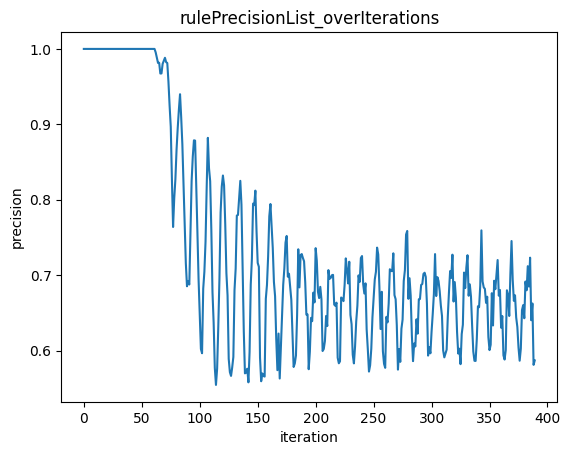

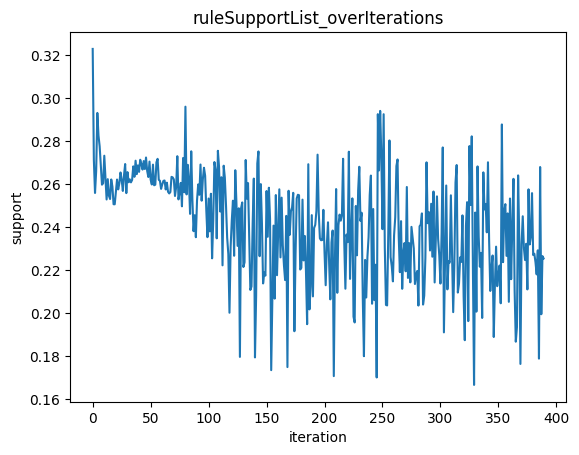

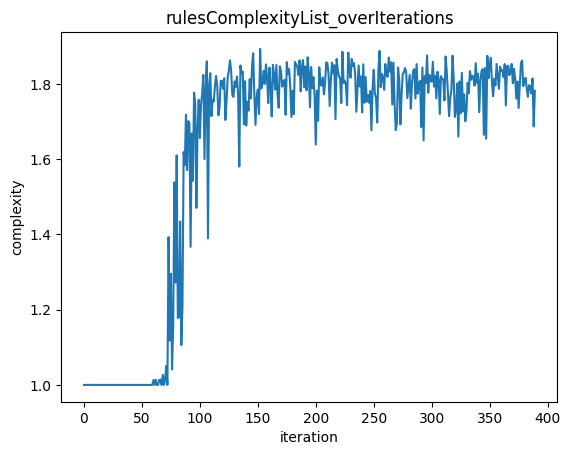

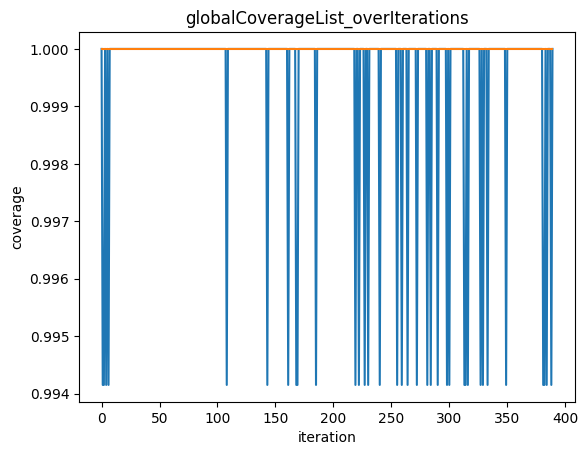

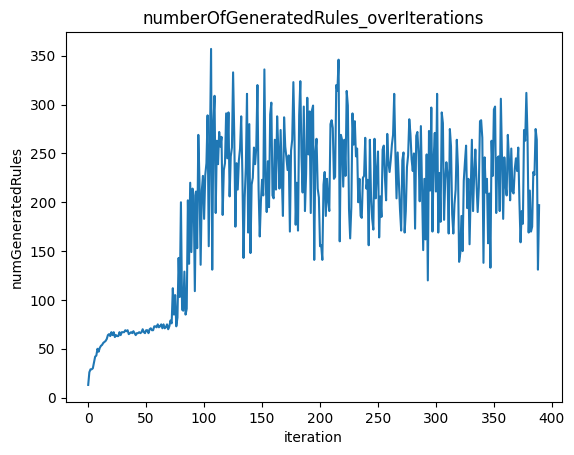

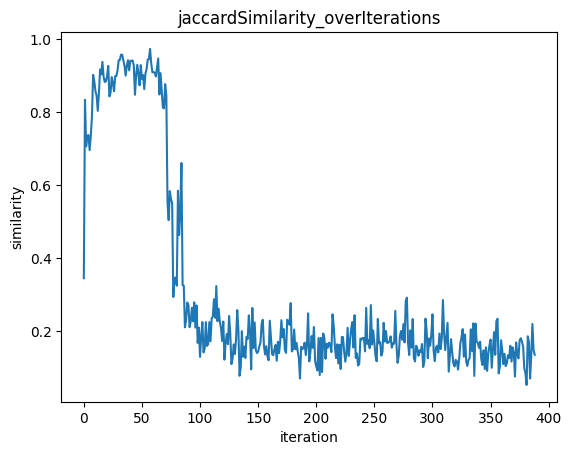

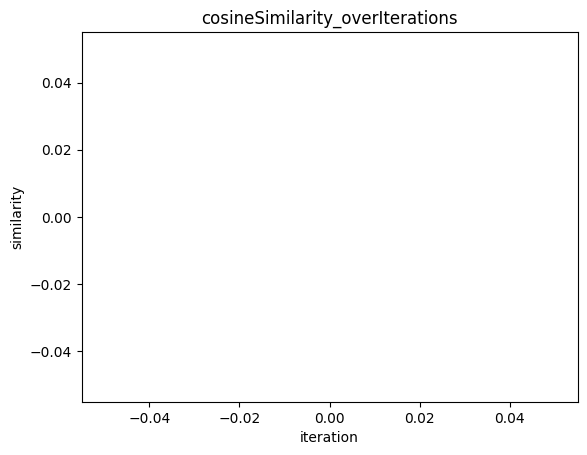

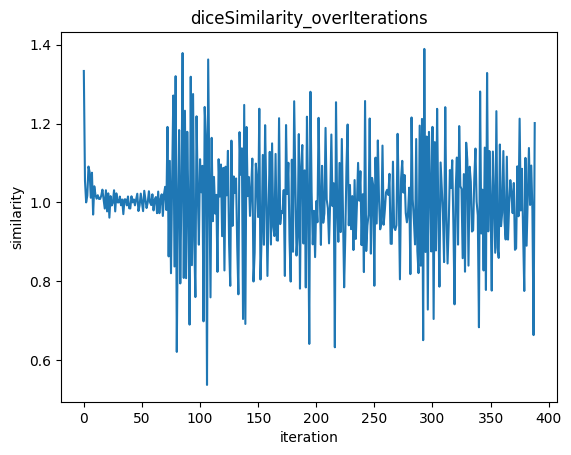

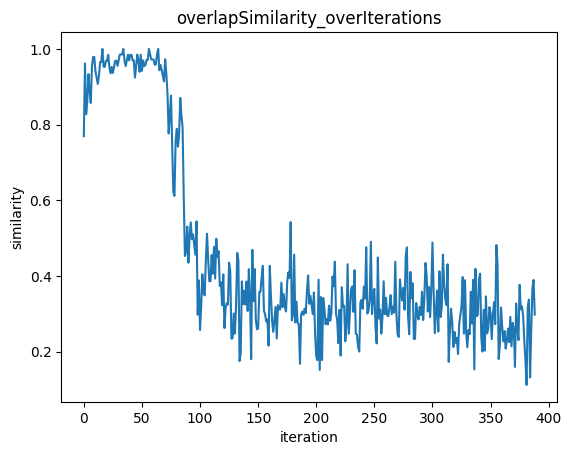

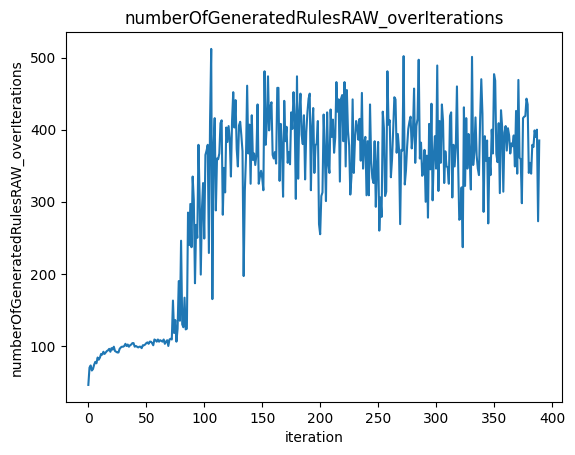

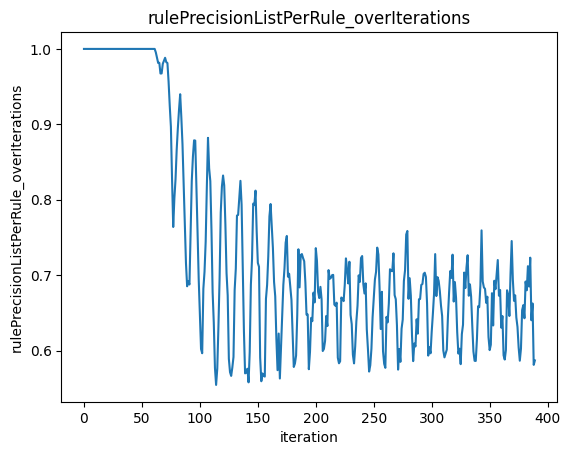

In [4]:
import os
rules_data = np.load(pathToNPZ , allow_pickle=True)

pathToDiscriminative_rules = "./Results/rulesResults/discriminative_rules/"
pathToCharacteristic_rules = "./Results/rulesResults/characteristic_rules"
resultPaths_dicriminative_rules = os.listdir(pathToDiscriminative_rules)
resultPaths_characteristic_rules = os.listdir(pathToCharacteristic_rules)
resultPaths_dicriminative_rules= np.sort(resultPaths_dicriminative_rules)

#get last generated rule

mostRecentResultPaths_discriminative = pathToDiscriminative_rules + (resultPaths_dicriminative_rules[-1])
data = utils.loadData(mostRecentResultPaths_discriminative)
temp_rules_list_overIterations = data["rules_list_overIterations_NOTFILTERD"]
print("...")

trackedRules_OHE_NOTFILTERED, item_to_index_NOTFILTERED,lables_OHE_NOTFILTERED = cega_utils.trackRulesList(temp_rules_list_overIterations, data["labelList_rules_overIterations_NOTFILTERED"])
trackedRules_OHE, item_to_index,lables_OHE = cega_utils.trackRulesList(data["rules_list_overIterations"], data["labelList_rules_overIterations"])
print(pathToNPZ)
utils.appendToNPZ(pathToNPZ, "trackedRules_OHE", trackedRules_OHE)
utils.appendToNPZ(pathToNPZ, "lables_OHE", lables_OHE)
utils.appendToNPZ(pathToNPZ, "item_to_index", item_to_index)
##
utils.appendToNPZ(pathToNPZ, "trackedRules_OHE_NOTFILTERED", trackedRules_OHE_NOTFILTERED)
utils.appendToNPZ(pathToNPZ, "lables_OHE_NOTFILTERED", lables_OHE_NOTFILTERED)
utils.appendToNPZ(pathToNPZ, "item_to_index_NOTFILTERD", item_to_index_NOTFILTERED)

plotResults.plotRulesResults(data)
_t_end = time()
print(f"Training finished in {int(_t_end - _t_start)} s")